# Outline of this notebook
- Data extraction from appropriate tables
- Data exploration
- Moving average calculation
- Observations

## Data extraction from appropriate tables

#### 1st Step:
            From the 'global_data' table, I extracted the whole table with the help of SQL(SELECT * FROM global_data)          
#### 2nd Step:            
            From the 'city_data' table, I extracted the appropriate informations with this query(SELECT * FROM city_data WHERE country = 'Bangladesh' and city = 'Dhaka')          

## Data Exploration

With the help of python "Pandas" library I tried to explore the global data and city data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
global_data_df = pd.read_csv('global_data.csv')
global_data_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [3]:
global_data_df.shape

(266, 2)

In [4]:
dhaka_city_temperature = pd.read_csv('dhaka_city_temperature.csv')
dhaka_city_temperature.head()

,year,city,country,avg_temp
0,1796,Dhaka,Bangladesh,25.35
1,1797,Dhaka,Bangladesh,26.36
2,1798,Dhaka,Bangladesh,25.22
3,1799,Dhaka,Bangladesh,25.61
4,1800,Dhaka,Bangladesh,25.54


In [5]:
dhaka_city_temperature.shape

(218, 4)

### Moving Average

Calculating simple moving averages and printing the dataframes.

In [6]:
for idx in range(0, global_data_df.shape[0] - 2):
    global_data_df.loc[idx+2, 'moving_avg'] = np.round( (global_data_df.loc[idx, 'avg_temp'] + global_data_df.loc[idx+1, 'avg_temp']\
                                                       + global_data_df.loc[idx+2, 'avg_temp'])/3, 1)
    
global_data_df.head()    

,year,avg_temp,moving_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,7.5
3,1753,8.39,7.4
4,1754,8.47,7.5


In [7]:
for idx in range(0, dhaka_city_temperature.shape[0] - 2):
    dhaka_city_temperature.loc[idx+2, 'moving_avg'] = np.round( (dhaka_city_temperature.loc[idx, 'avg_temp'] + dhaka_city_temperature.loc[idx+1, 'avg_temp']\
                                                       + dhaka_city_temperature.loc[idx+2, 'avg_temp'])/3, 1)
    
dhaka_city_temperature.head()    

,year,city,country,avg_temp,moving_avg
0,1796,Dhaka,Bangladesh,25.35,NaN
1,1797,Dhaka,Bangladesh,26.36,NaN
2,1798,Dhaka,Bangladesh,25.22,25.6
3,1799,Dhaka,Bangladesh,25.61,25.7
4,1800,Dhaka,Bangladesh,25.54,25.5


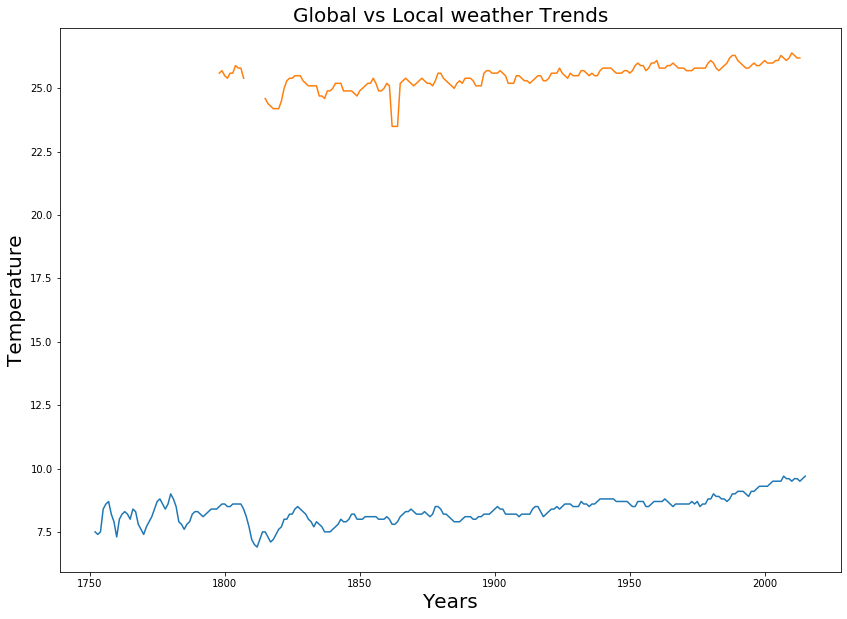

In [21]:
fig = plt.figure(figsize=[14,10])
plt.plot(global_data_df['year'], global_data_df['moving_avg'])
plt.plot(dhaka_city_temperature['year'], dhaka_city_temperature['moving_avg'])
plt.title('Global vs Local weather Trends', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.show()

## Observations

1 - We have global temperature data from 1750 and dhaka temperature data from 1796. And aslo after 1800's there are some missing values in dhaka temperature.

2 - We can notice there is a huge gap between the two line charts.

3 - In both lines we can notice that the temperature is increasing slowly.

4 - If we see the global temperature line there was a drop of temperature in between 1800-1830 year. And in between 1850-1870 year, there was also a drop of temperature in dhaka temperature line.

### Resources:
- https://www.datacamp.com/community/tutorials/moving-averages-in-pandas